# `Anomaly Detection in Time Series Data`

In [278]:
import pandas as pd
import numpy as np

In [279]:
data = pd.read_csv('data.csv')
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,1/1/2017 0:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,1/1/2017 0:05,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,1/1/2017 0:10,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,1/1/2017 0:15,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,1/1/2017 0:20,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [280]:
data.shape

(377719, 7)

In [281]:
data.describe()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719,377719,377719,377719,377719,377719,377719
unique,377719,39736,39662,27669,26487,48044,24010
top,1/1/2017 0:00,Not Connect,0,Not Connect,Not Connect,28.88,Not Connect
freq,1,723,14226,723,723,2036,723


In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   time                      377719 non-null  object
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object
 2   Cyclone_Material_Temp     377719 non-null  object
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object
 4   Cyclone_cone_draft        377719 non-null  object
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object
 6   Cyclone_Inlet_Draft       377719 non-null  object
dtypes: object(7)
memory usage: 20.2+ MB


In [283]:
import general_overview as summary   # my function
summary.summary_report_general(data)

,column_name,data_type,missing,missing%,uniques,unique%,count
0,time,object,0,0.0,377719,100.000000,377719
1,Cyclone_Inlet_Gas_Temp,object,0,0.0,39736,10.519990,377719
2,Cyclone_Material_Temp,object,0,0.0,39662,10.500398,377719
3,Cyclone_Outlet_Gas_draft,object,0,0.0,27669,7.325287,377719
4,Cyclone_cone_draft,object,0,0.0,26487,7.012356,377719
5,Cyclone_Gas_Outlet_Temp,object,0,0.0,48044,12.719508,377719
6,Cyclone_Inlet_Draft,object,0,0.0,24010,6.356577,377719


## `Choosed 0 as it is the obvious anomaly of no reading`

In [284]:
data.replace(['Not Connect','I/O Timeout','Scan Timeout','Configure','Comm Fail','Unit Down'],0,inplace=True)

In [285]:
data.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft'],
      dtype='object')

In [286]:
data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']] = data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']].astype(float)

In [287]:
data.dtypes

time                         object
Cyclone_Inlet_Gas_Temp      float64
Cyclone_Material_Temp       float64
Cyclone_Outlet_Gas_draft    float64
Cyclone_cone_draft          float64
Cyclone_Gas_Outlet_Temp     float64
Cyclone_Inlet_Draft         float64
dtype: object

In [288]:
cat = []
num = []
for i in data.columns:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

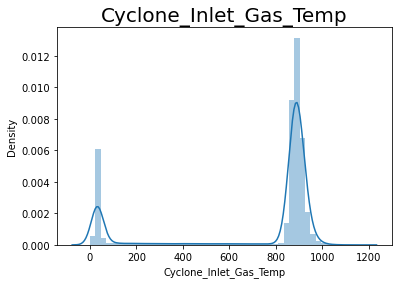

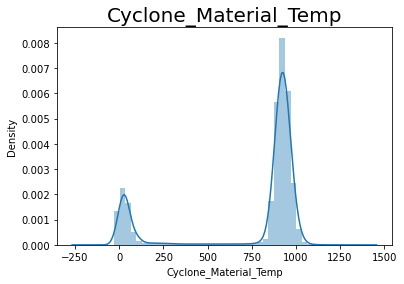

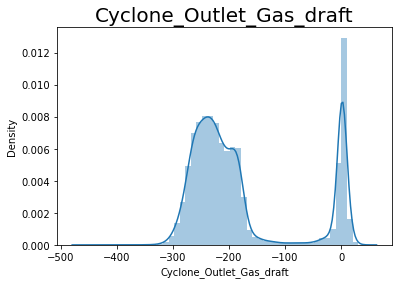

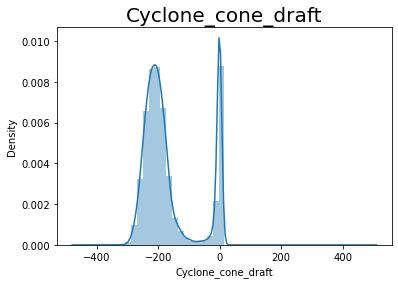

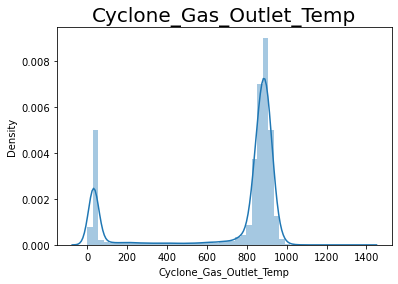

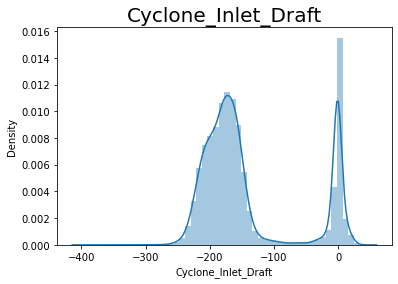

In [293]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
for i in num:
    plt.title(i,fontsize=20)
    sns.distplot(data[i])
    plt.show()

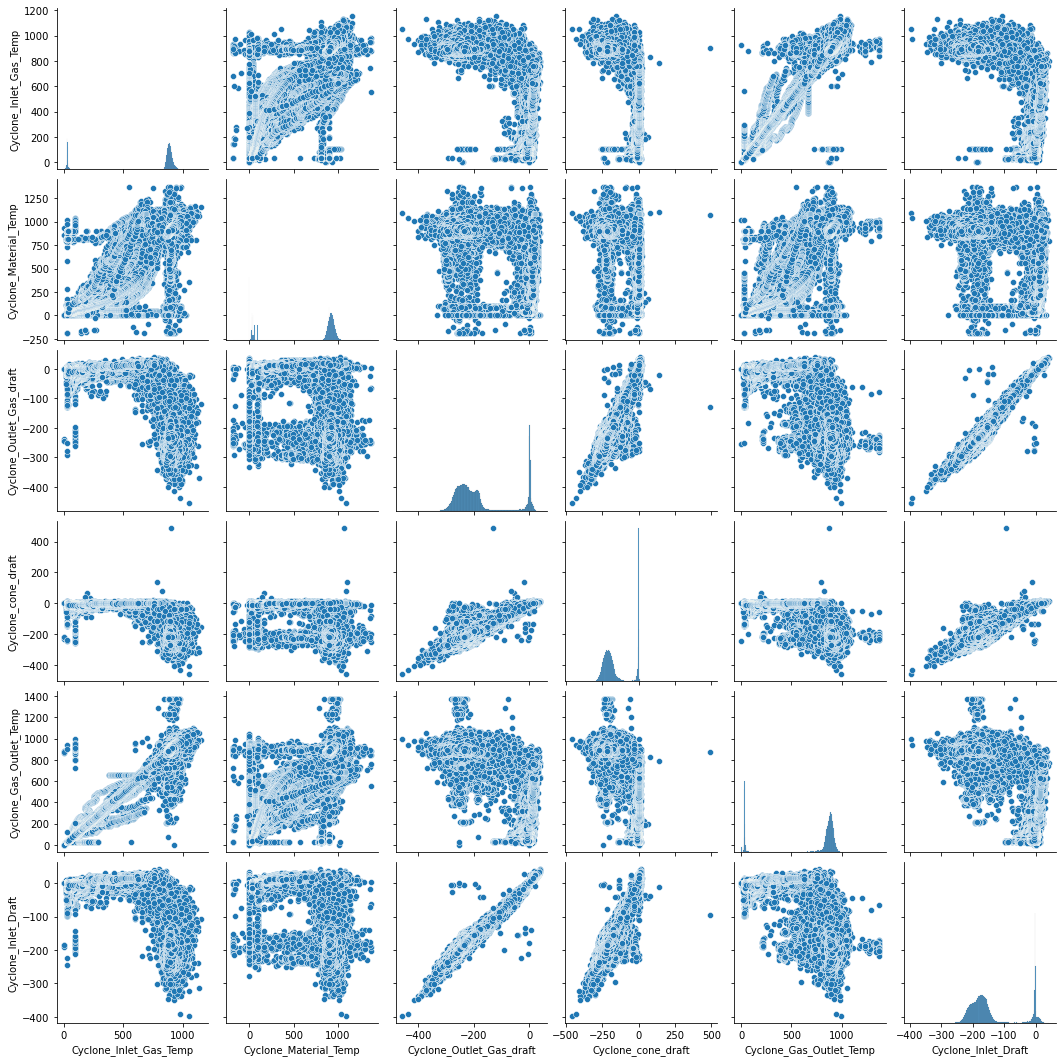

In [294]:
sns.pairplot(data[num])

In [298]:
data['timestamp'] = pd.to_datetime(data['time'])
data.drop('time',axis=1,inplace=True)

In [299]:
data.dtypes

Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
timestamp                   datetime64[ns]
dtype: object

## `Data is ready for further analysis`